# 1. Data Cleaning

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Dense
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("Data/NY property data.csv")

In [3]:
df.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,...,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,...,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,...,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,...,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,...,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR


In [4]:
df = df[['BBLE',
         'B',
         'TAXCLASS',
         'ZIP',
         'BLOCK',
         'BLDGCL',
         'FULLVAL', 
         'AVLAND', 
         'AVTOT', 
         'LTFRONT', 
         'LTDEPTH', 
         'BLDFRONT', 
         'BLDDEPTH', 
         'STORIES']]

In [5]:
df.head()

,BBLE,B,TAXCLASS,ZIP,BLOCK,BLDGCL,FULLVAL,AVLAND,AVTOT,LTFRONT,LTDEPTH,BLDFRONT,BLDDEPTH,STORIES
0,1000010101,1,4,10004.0,1,P7,21400000.0,4225500.0,9630000.0,500,1046,0,0,NaN
1,1000010201,1,4,10004.0,1,Z9,193800000.0,14310000.0,87210000.0,27,0,0,0,NaN
2,1000020001,1,4,10004.0,2,Y7,104686000.0,39008700.0,47108700.0,709,564,709,564,3.0
3,1000020023,1,4,10004.0,2,T2,39200000.0,15255000.0,17640000.0,793,551,85,551,2.0
4,1000030001,1,4,10004.0,3,Q1,272300000.0,121050000.0,122535000.0,323,1260,89,57,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070994 entries, 0 to 1070993
Data columns (total 14 columns):
BBLE        1070994 non-null object
B           1070994 non-null int64
TAXCLASS    1070994 non-null object
ZIP         1041104 non-null float64
BLOCK       1070994 non-null int64
BLDGCL      1070994 non-null object
FULLVAL     1070994 non-null float64
AVLAND      1070994 non-null float64
AVTOT       1070994 non-null float64
LTFRONT     1070994 non-null int64
LTDEPTH     1070994 non-null int64
BLDFRONT    1070994 non-null int64
BLDDEPTH    1070994 non-null int64
STORIES     1014730 non-null float64
dtypes: float64(5), int64(6), object(3)
memory usage: 114.4+ MB


In [7]:
df.describe()

,B,ZIP,BLOCK,FULLVAL,AVLAND,AVTOT,LTFRONT,LTDEPTH,BLDFRONT,BLDDEPTH,STORIES
count,1.070994e+06,1.041104e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.014730e+06
mean,3.215427e+00,1.092396e+04,4.757239e+03,8.742645e+05,8.506792e+04,2.272382e+05,3.663530e+01,8.886159e+01,2.304277e+01,3.992284e+01,5.006918e+00
std,1.201197e+00,5.284208e+02,3.676579e+03,1.158243e+07,4.057260e+06,6.877529e+06,7.403284e+01,7.639628e+01,3.557970e+01,4.270715e+01,8.365707e+00
min,1.000000e+00,1.000100e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,3.000000e+00,1.031400e+04,1.555000e+03,3.040000e+05,9.180000e+03,1.837400e+04,1.900000e+01,8.000000e+01,1.500000e+01,2.600000e+01,2.000000e+00
50%,3.000000e+00,1.121400e+04,4.047000e+03,4.470000e+05,1.367800e+04,2.534000e+04,2.500000e+01,1.000000e+02,2.000000e+01,3.900000e+01,2.000000e+00
75%,4.000000e+00,1.136400e+04,6.898000e+03,6.190000e+05,1.974000e+04,4.543800e+04,4.000000e+01,1.000000e+02,2.400000e+01,5.000000e+01,3.000000e+00
max,5.000000e+00,3.380300e+04,1.635000e+04,6.150000e+09,2.668500e+09,4.668309e+09,9.999000e+03,9.999000e+03,7.575000e+03,9.393000e+03,1.190000e+02


In [8]:
df_res = df.copy()

## 1.1 Fill Zip by [B, BLOCK]

In [9]:
def fill_zip(df, by):
    df_ZIP_NotNA = df[df['ZIP'].notna()]
    ZIP = df_ZIP_NotNA.groupby(by)["ZIP"].agg(lambda x: stats.mode(x)[0][0]).reset_index()
    temp_df = pd.merge(left = df, right = ZIP, on = by, how = 'left')
    temp_df_w = temp_df[['ZIP_x', 'ZIP_y']]
    res = []
    for index, row in temp_df_w.iterrows():
        if np.isnan(row['ZIP_x']):
            res.append(row['ZIP_y'])
        else:
            res.append(row['ZIP_x'])
    return res

In [10]:
B_BLOCK = fill_zip(df, ['B', 'BLOCK'])

In [11]:
df_res['ZIP'] = B_BLOCK

In [12]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070994 entries, 0 to 1070993
Data columns (total 14 columns):
BBLE        1070994 non-null object
B           1070994 non-null int64
TAXCLASS    1070994 non-null object
ZIP         1068546 non-null float64
BLOCK       1070994 non-null int64
BLDGCL      1070994 non-null object
FULLVAL     1070994 non-null float64
AVLAND      1070994 non-null float64
AVTOT       1070994 non-null float64
LTFRONT     1070994 non-null int64
LTDEPTH     1070994 non-null int64
BLDFRONT    1070994 non-null int64
BLDDEPTH    1070994 non-null int64
STORIES     1014730 non-null float64
dtypes: float64(5), int64(6), object(3)
memory usage: 114.4+ MB


In [13]:
B = fill_zip(df_res, ['B'])

In [14]:
df_res['ZIP'] = B

In [15]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070994 entries, 0 to 1070993
Data columns (total 14 columns):
BBLE        1070994 non-null object
B           1070994 non-null int64
TAXCLASS    1070994 non-null object
ZIP         1070994 non-null float64
BLOCK       1070994 non-null int64
BLDGCL      1070994 non-null object
FULLVAL     1070994 non-null float64
AVLAND      1070994 non-null float64
AVTOT       1070994 non-null float64
LTFRONT     1070994 non-null int64
LTDEPTH     1070994 non-null int64
BLDFRONT    1070994 non-null int64
BLDDEPTH    1070994 non-null int64
STORIES     1014730 non-null float64
dtypes: float64(5), int64(6), object(3)
memory usage: 114.4+ MB


In [16]:
df['ZIP'] = B

## 1.2 Fill FULLVAL by [BLDGCL, ZIP]

In [17]:
def fill_fullval(df, by):
    df_FULLVAL_Not0 = df[df['FULLVAL'] != 0]
    FULLVAL = df_FULLVAL_Not0.groupby(by)["FULLVAL"].median().reset_index()
    temp_df = pd.merge(left = df, right = FULLVAL, on = by, how = 'left')
    temp_df_w = temp_df[['FULLVAL_x', 'FULLVAL_y']]
    res = []
    for index, row in temp_df_w.iterrows():
        if (row['FULLVAL_x'] == 0) or (np.isnan(row['FULLVAL_x'])):
            res.append(row['FULLVAL_y'])
        else:
            res.append(row['FULLVAL_x'])
    return res

In [18]:
BLDGCL_ZIP = fill_fullval(df, ['BLDGCL', 'ZIP'])

In [19]:
df_res['FULLVAL'] = BLDGCL_ZIP

In [20]:
df_res['FULLVAL'].describe()

count    1.060793e+06
mean     8.880004e+05
std      1.165201e+07
min      4.000000e+00
25%      3.103000e+05
50%      4.500000e+05
75%      6.230000e+05
max      6.150000e+09
Name: FULLVAL, dtype: float64

In [21]:
sum(df_res['FULLVAL'].isna())

10201

In [22]:
ZIP = fill_fullval(df_res, ['ZIP'])

In [23]:
df_res['FULLVAL'] = ZIP

In [24]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070994 entries, 0 to 1070993
Data columns (total 14 columns):
BBLE        1070994 non-null object
B           1070994 non-null int64
TAXCLASS    1070994 non-null object
ZIP         1070994 non-null float64
BLOCK       1070994 non-null int64
BLDGCL      1070994 non-null object
FULLVAL     1070994 non-null float64
AVLAND      1070994 non-null float64
AVTOT       1070994 non-null float64
LTFRONT     1070994 non-null int64
LTDEPTH     1070994 non-null int64
BLDFRONT    1070994 non-null int64
BLDDEPTH    1070994 non-null int64
STORIES     1014730 non-null float64
dtypes: float64(5), int64(6), object(3)
memory usage: 114.4+ MB


## 1.3 Fill AVLAND by [BLDGCL, ZIP]

In [25]:
def fill_avland(df, by):
    df_AVLAND_Not0 = df[df['AVLAND'] != 0]
    AVLAND = df_AVLAND_Not0.groupby(by)["AVLAND"].median().reset_index()
    temp_df = pd.merge(left = df, right = AVLAND, on = by, how = 'left')
    temp_df_w = temp_df[['AVLAND_x', 'AVLAND_y']]
    res = []
    for index, row in temp_df_w.iterrows():
        if (row['AVLAND_x'] == 0) or (np.isnan(row['AVLAND_x'])):
            res.append(row['AVLAND_y'])
        else:
            res.append(row['AVLAND_x'])
    return res

In [26]:
BLDGCL_ZIP = fill_avland(df_res, ['BLDGCL', 'ZIP'])

In [27]:
df_temp = df_res.copy()

In [28]:
df_temp['AVLAND'] = BLDGCL_ZIP

In [29]:
df_temp['AVLAND'].describe()

count    1.060793e+06
mean     8.661529e+04
std      4.078684e+06
min      1.000000e+00
25%      9.429000e+03
50%      1.378100e+04
75%      1.987600e+04
max      2.668500e+09
Name: AVLAND, dtype: float64

In [30]:
ZIP = fill_avland(df_temp, ['ZIP'])

In [31]:
df_temp['AVLAND'] = ZIP

In [32]:
df_temp['AVLAND'].describe()

count    1.070994e+06
mean     8.599032e+04
std      4.059247e+06
min      1.000000e+00
25%      9.462000e+03
50%      1.379300e+04
75%      1.987000e+04
max      2.668500e+09
Name: AVLAND, dtype: float64

In [33]:
df_res = df_temp.copy()

## 1.4 Fill AVTOT by [BLDGCL, ZIP]

In [34]:
def fill_avtot(df, by):
    df_AVTOT_Not0 = df[df['AVTOT'] != 0]
    AVTOT = df_AVTOT_Not0.groupby(by)["AVTOT"].median().reset_index()
    temp_df = pd.merge(left = df, right = AVTOT, on = by, how = 'left')
    temp_df_w = temp_df[['AVTOT_x', 'AVTOT_y']]
    res = []
    for index, row in temp_df_w.iterrows():
        if (row['AVTOT_x'] == 0) or (np.isnan(row['AVTOT_x'])):
            res.append(row['AVTOT_y'])
        else:
            res.append(row['AVTOT_x'])
    return res

In [35]:
BLDGCL_ZIP = fill_avtot(df_res, ['BLDGCL', 'ZIP'])

In [36]:
df_temp = df_res.copy()

In [37]:
df_temp['AVTOT'] = BLDGCL_ZIP

In [38]:
df_temp['AVTOT'].describe()

count    1.060793e+06
mean     2.316296e+05
std      6.915428e+06
min      1.000000e+00
25%      1.864900e+04
50%      2.556000e+04
75%      4.635000e+04
max      4.668309e+09
Name: AVTOT, dtype: float64

In [39]:
ZIP = fill_avtot(df_temp, ['ZIP'])

In [40]:
df_temp['AVTOT'] = ZIP

In [41]:
df_temp['AVTOT'].describe()

count    1.070994e+06
mean     2.301927e+05
std      6.884520e+06
min      1.000000e+00
25%      1.866200e+04
50%      2.562700e+04
75%      4.643200e+04
max      4.668309e+09
Name: AVTOT, dtype: float64

In [42]:
df_res = df_temp.copy()

## 1.5 Fill LTFRONT by [BLDGCL, ZIP]

In [43]:
def fill_ltfront(df, by):
    df_LTFRONT_Not0 = df[df['LTFRONT'] != 0]
    LTFRONT = df_LTFRONT_Not0.groupby(by)["LTFRONT"].median().reset_index()
    temp_df = pd.merge(left = df, right = LTFRONT, on = by, how = 'left')
    temp_df_w = temp_df[['LTFRONT_x', 'LTFRONT_y']]
    res = []
    for index, row in temp_df_w.iterrows():
        if (row['LTFRONT_x'] == 0) or (np.isnan(row['LTFRONT_x'])):
            res.append(row['LTFRONT_y'])
        else:
            res.append(row['LTFRONT_x'])
    return res

In [44]:
BLDGCL_ZIP = fill_ltfront(df_res, ['BLDGCL', 'ZIP'])

In [45]:
df_temp = df_res.copy()

In [46]:
df_temp['LTFRONT'] = BLDGCL_ZIP

In [47]:
df_temp['LTFRONT'].describe()

count    1.055124e+06
mean     5.997583e+01
std      1.037124e+02
min      1.000000e+00
25%      2.100000e+01
50%      3.000000e+01
75%      5.200000e+01
max      9.999000e+03
Name: LTFRONT, dtype: float64

In [48]:
BLDGCL = fill_ltfront(df_temp, ['BLDGCL'])

In [49]:
df_temp['LTFRONT'] = BLDGCL

In [50]:
df_temp['LTFRONT'].describe()

count    1.070994e+06
mean     6.046891e+01
std      1.031345e+02
min      1.000000e+00
25%      2.100000e+01
50%      3.000000e+01
75%      5.600000e+01
max      9.999000e+03
Name: LTFRONT, dtype: float64

In [51]:
df_res = df_temp.copy()

## 1.6 Fill LTDEPTH by [BLDGCL, ZIP]

In [52]:
def fill_ltdepth(df, by):
    df_LTDEPTH_Not0 = df[df['LTDEPTH'] != 0]
    LTDEPTH = df_LTDEPTH_Not0.groupby(by)["LTDEPTH"].median().reset_index()
    temp_df = pd.merge(left = df, right = LTDEPTH, on = by, how = 'left')
    temp_df_w = temp_df[['LTDEPTH_x', 'LTDEPTH_y']]
    res = []
    for index, row in temp_df_w.iterrows():
        if (row['LTDEPTH_x'] == 0) or (np.isnan(row['LTDEPTH_x'])):
            res.append(row['LTDEPTH_y'])
        else:
            res.append(row['LTDEPTH_x'])
    return res

In [53]:
BLDGCL_ZIP = fill_ltdepth(df_res, ['BLDGCL', 'ZIP'])

In [54]:
df_temp = df_res.copy()

In [55]:
df_temp['LTDEPTH'] = BLDGCL_ZIP

In [56]:
df_temp['LTDEPTH'].describe()

count    1.053387e+06
mean     1.134922e+02
std      8.438982e+01
min      1.000000e+00
25%      9.900000e+01
50%      1.000000e+02
75%      1.020000e+02
max      9.999000e+03
Name: LTDEPTH, dtype: float64

In [57]:
BLDGCL = fill_ltdepth(df_temp, ['BLDGCL'])

In [58]:
df_temp['LTDEPTH'] = BLDGCL

In [59]:
df_temp['LTDEPTH'].describe()

count    1.070994e+06
mean     1.134198e+02
std      8.376743e+01
min      1.000000e+00
25%      9.900000e+01
50%      1.000000e+02
75%      1.020000e+02
max      9.999000e+03
Name: LTDEPTH, dtype: float64

In [60]:
df_res = df_temp.copy()

## 1.7 Fill BLDFRONT by [BLDGCL, ZIP]

In [61]:
def fill_bldfront(df, by):
    df_BLDFRONT_Not0 = df[df['BLDFRONT'] != 0]
    BLDFRONT = df_BLDFRONT_Not0.groupby(by)["BLDFRONT"].median().reset_index()
    temp_df = pd.merge(left = df, right = BLDFRONT, on = by, how = 'left')
    temp_df_w = temp_df[['BLDFRONT_x', 'BLDFRONT_y']]
    res = []
    for index, row in temp_df_w.iterrows():
        if (row['BLDFRONT_x'] == 0) or (np.isnan(row['BLDFRONT_x'])):
            res.append(row['BLDFRONT_y'])
        else:
            res.append(row['BLDFRONT_x'])
    return res

In [62]:
BLDGCL_ZIP = fill_bldfront(df_res, ['BLDGCL', 'ZIP'])

In [63]:
df_temp = df_res.copy()

In [64]:
df_temp['BLDFRONT'] = BLDGCL_ZIP

In [65]:
df_temp['BLDFRONT'].describe()

count    996331.000000
mean         39.269110
std          48.040249
min           1.000000
25%          19.000000
50%          22.000000
75%          30.000000
max        7575.000000
Name: BLDFRONT, dtype: float64

In [66]:
BLDGCL = fill_bldfront(df_temp, ['BLDGCL'])

In [67]:
df_temp['BLDFRONT'] = BLDGCL

In [68]:
df_temp['BLDFRONT'].describe()

count    1.066714e+06
mean     4.077476e+01
std      4.745941e+01
min      1.000000e+00
25%      2.000000e+01
50%      2.200000e+01
75%      4.000000e+01
max      7.575000e+03
Name: BLDFRONT, dtype: float64

In [69]:
ZIP = fill_bldfront(df_temp, ['ZIP'])

In [70]:
df_temp['BLDFRONT'] = ZIP

In [71]:
df_temp['BLDFRONT'].describe()

count    1.070994e+06
mean     4.073835e+01
std      4.739546e+01
min      1.000000e+00
25%      2.000000e+01
50%      2.200000e+01
75%      4.000000e+01
max      7.575000e+03
Name: BLDFRONT, dtype: float64

In [72]:
df_res = df_temp.copy()

## 1.8 Fill BLDDEPTH by [BLDGCL, ZIP]

In [73]:
def fill_blddepth(df, by):
    df_BLDDEPTH_Not0 = df[df['BLDDEPTH'] != 0]
    BLDDEPTH = df_BLDDEPTH_Not0.groupby(by)["BLDDEPTH"].median().reset_index()
    temp_df = pd.merge(left = df, right = BLDDEPTH, on = by, how = 'left')
    temp_df_w = temp_df[['BLDDEPTH_x', 'BLDDEPTH_y']]
    res = []
    for index, row in temp_df_w.iterrows():
        if (row['BLDDEPTH_x'] == 0) or (np.isnan(row['BLDDEPTH_x'])):
            res.append(row['BLDDEPTH_y'])
        else:
            res.append(row['BLDDEPTH_x'])
    return res

In [74]:
BLDGCL_ZIP = fill_blddepth(df_res, ['BLDGCL', 'ZIP'])

In [75]:
df_temp = df_res.copy()

In [76]:
df_temp['BLDDEPTH'] = BLDGCL_ZIP

In [77]:
df_temp['BLDDEPTH'].describe()

count    996334.000000
mean         59.700814
std          57.485369
min           1.000000
25%          36.000000
50%          46.000000
75%          64.000000
max        9393.000000
Name: BLDDEPTH, dtype: float64

In [78]:
BLDGCL = fill_blddepth(df_temp, ['BLDGCL'])

In [79]:
df_temp['BLDDEPTH'] = BLDGCL

In [80]:
df_temp['BLDDEPTH'].describe()

count    1.067713e+06
mean     6.151444e+01
std      5.629237e+01
min      1.000000e+00
25%      3.600000e+01
50%      4.800000e+01
75%      7.200000e+01
max      9.393000e+03
Name: BLDDEPTH, dtype: float64

In [81]:
ZIP = fill_blddepth(df_temp, ['ZIP'])

In [82]:
df_temp['BLDDEPTH'] = ZIP

In [83]:
df_temp['BLDDEPTH'].describe()

count    1.070994e+06
mean     6.149731e+01
std      5.623082e+01
min      1.000000e+00
25%      3.600000e+01
50%      4.800000e+01
75%      7.200000e+01
max      9.393000e+03
Name: BLDDEPTH, dtype: float64

In [84]:
df_res = df_temp.copy()

## 1.9 Fill STORIES by [BLDGCL, ZIP]

In [85]:
def fill_stories(df, by):
    df_STORIES_NotNA = df[df['STORIES'].notna()]
    STORIES = df_STORIES_NotNA.groupby(by)["STORIES"].agg(lambda x: stats.mode(x)[0][0]).reset_index()
    temp_df = pd.merge(left = df, right = STORIES, on = by, how = 'left')
    temp_df_w = temp_df[['STORIES_x', 'STORIES_y']]
    res = []
    for index, row in temp_df_w.iterrows():
        if np.isnan(row['STORIES_x']):
            res.append(row['STORIES_y'])
        else:
            res.append(row['STORIES_x'])
    return res

In [86]:
BLDGCL_ZIP = fill_stories(df_res, ['BLDGCL', 'ZIP'])

In [87]:
df_temp = df_res.copy()

In [88]:
df_temp['STORIES'] = BLDGCL_ZIP

In [89]:
df_temp['STORIES'].describe()

count    1.029255e+06
mean     5.022109e+00
std      8.404878e+00
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      1.190000e+02
Name: STORIES, dtype: float64

In [90]:
BLDGCL = fill_stories(df_temp, ['BLDGCL'])

In [91]:
df_temp['STORIES'] = BLDGCL

In [92]:
df_temp['STORIES'].describe()

count    1.066714e+06
mean     4.985859e+00
std      8.262626e+00
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      1.190000e+02
Name: STORIES, dtype: float64

In [93]:
ZIP = fill_stories(df_temp, ['ZIP'])

In [94]:
df_temp['STORIES'] = ZIP

In [95]:
df_temp['STORIES'].describe()

count    1.070994e+06
mean     4.981610e+00
std      8.259137e+00
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      1.190000e+02
Name: STORIES, dtype: float64

In [96]:
df_res = df_temp.copy()

## 1.10 Check

In [97]:
df_res.head()

,BBLE,B,TAXCLASS,ZIP,BLOCK,BLDGCL,FULLVAL,AVLAND,AVTOT,LTFRONT,LTDEPTH,BLDFRONT,BLDDEPTH,STORIES
0,1000010101,1,4,10004.0,1,P7,21400000.0,4225500.0,9630000.0,500.0,1046.0,37.5,66.0,3.0
1,1000010201,1,4,10004.0,1,Z9,193800000.0,14310000.0,87210000.0,27.0,177.0,37.0,227.0,3.0
2,1000020001,1,4,10004.0,2,Y7,104686000.0,39008700.0,47108700.0,709.0,564.0,709.0,564.0,3.0
3,1000020023,1,4,10004.0,2,T2,39200000.0,15255000.0,17640000.0,793.0,551.0,85.0,551.0,2.0
4,1000030001,1,4,10004.0,3,Q1,272300000.0,121050000.0,122535000.0,323.0,1260.0,89.0,57.0,1.0


In [98]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070994 entries, 0 to 1070993
Data columns (total 14 columns):
BBLE        1070994 non-null object
B           1070994 non-null int64
TAXCLASS    1070994 non-null object
ZIP         1070994 non-null float64
BLOCK       1070994 non-null int64
BLDGCL      1070994 non-null object
FULLVAL     1070994 non-null float64
AVLAND      1070994 non-null float64
AVTOT       1070994 non-null float64
LTFRONT     1070994 non-null float64
LTDEPTH     1070994 non-null float64
BLDFRONT    1070994 non-null float64
BLDDEPTH    1070994 non-null float64
STORIES     1070994 non-null float64
dtypes: float64(9), int64(2), object(3)
memory usage: 114.4+ MB


In [99]:
df_res.describe()

,B,ZIP,BLOCK,FULLVAL,AVLAND,AVTOT,LTFRONT,LTDEPTH,BLDFRONT,BLDDEPTH,STORIES
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06
mean,3.215427e+00,1.092022e+04,4.757239e+03,8.846037e+05,8.599032e+04,2.301927e+05,6.046891e+01,1.134198e+02,4.073835e+01,6.149731e+01,4.981610e+00
std,1.201197e+00,5.285420e+02,3.676579e+03,1.160255e+07,4.059247e+06,6.884520e+06,1.031345e+02,8.376743e+01,4.739546e+01,5.623082e+01,8.259137e+00
min,1.000000e+00,1.000100e+04,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.000000e+00,1.031400e+04,1.555000e+03,3.110000e+05,9.462000e+03,1.866200e+04,2.100000e+01,9.900000e+01,2.000000e+01,3.600000e+01,2.000000e+00
50%,3.000000e+00,1.121400e+04,4.047000e+03,4.500000e+05,1.379300e+04,2.562700e+04,3.000000e+01,1.000000e+02,2.200000e+01,4.800000e+01,2.000000e+00
75%,4.000000e+00,1.136300e+04,6.898000e+03,6.220000e+05,1.987000e+04,4.643200e+04,5.600000e+01,1.020000e+02,4.000000e+01,7.200000e+01,3.000000e+00
max,5.000000e+00,3.380300e+04,1.635000e+04,6.150000e+09,2.668500e+09,4.668309e+09,9.999000e+03,9.999000e+03,7.575000e+03,9.393000e+03,1.190000e+02


In [ ]:
df_res.to_csv('Data/Cleaned Data.csv')

# 2. Normalization

In [2]:
df = pd.read_csv('Data/Cleaned Data.csv', index_col = 0)

In [3]:
list(df.columns)

['BBLE',
 'B',
 'TAXCLASS',
 'ZIP',
 'BLOCK',
 'BLDGCL',
 'FULLVAL',
 'AVLAND',
 'AVTOT',
 'LTFRONT',
 'LTDEPTH',
 'BLDFRONT',
 'BLDDEPTH',
 'STORIES']

In [4]:
df.head()

,BBLE,B,TAXCLASS,ZIP,BLOCK,BLDGCL,FULLVAL,AVLAND,AVTOT,LTFRONT,LTDEPTH,BLDFRONT,BLDDEPTH,STORIES
0,1000010101,1,4,10004.0,1,P7,21400000.0,4225500.0,9630000.0,500.0,1046.0,37.5,66.0,3.0
1,1000010201,1,4,10004.0,1,Z9,193800000.0,14310000.0,87210000.0,27.0,177.0,37.0,227.0,3.0
2,1000020001,1,4,10004.0,2,Y7,104686000.0,39008700.0,47108700.0,709.0,564.0,709.0,564.0,3.0
3,1000020023,1,4,10004.0,2,T2,39200000.0,15255000.0,17640000.0,793.0,551.0,85.0,551.0,2.0
4,1000030001,1,4,10004.0,3,Q1,272300000.0,121050000.0,122535000.0,323.0,1260.0,89.0,57.0,1.0


In [5]:
del df['BLDGCL'], df['BLOCK']

In [6]:
ZIP5 = df['ZIP'].astype('str').str.slice(start = 0, stop = 5)
ZIP3 = ZIP5.str.slice(stop = 3)

In [7]:
del df['ZIP']
df['ZIP5'] = ZIP5
df['ZIP3'] = ZIP3

In [8]:
df.head()

,BBLE,B,TAXCLASS,FULLVAL,AVLAND,AVTOT,LTFRONT,LTDEPTH,BLDFRONT,BLDDEPTH,STORIES,ZIP5,ZIP3
0,1000010101,1,4,21400000.0,4225500.0,9630000.0,500.0,1046.0,37.5,66.0,3.0,10004,100
1,1000010201,1,4,193800000.0,14310000.0,87210000.0,27.0,177.0,37.0,227.0,3.0,10004,100
2,1000020001,1,4,104686000.0,39008700.0,47108700.0,709.0,564.0,709.0,564.0,3.0,10004,100
3,1000020023,1,4,39200000.0,15255000.0,17640000.0,793.0,551.0,85.0,551.0,2.0,10004,100
4,1000030001,1,4,272300000.0,121050000.0,122535000.0,323.0,1260.0,89.0,57.0,1.0,10004,100


In [9]:
LOTAREA = np.multiply(df["LTFRONT"], df['LTDEPTH'])
BLDAREA = np.multiply(df["BLDFRONT"], df['BLDDEPTH'])
BLDTOT = np.multiply(BLDAREA, df['STORIES'])

In [10]:
df['LOTAREA'] = LOTAREA
df['BLDAREA'] = BLDAREA
df['BLDTOT'] = BLDTOT

In [11]:
del df['LTFRONT'], df['LTDEPTH'], df['BLDFRONT'], df['BLDDEPTH'], df['STORIES']

In [12]:
df_new = df.copy()

In [13]:
values = ['FULLVAL', 'AVLAND', 'AVTOT']
areas = ['LOTAREA', 'BLDAREA', 'BLDTOT']
for value in values:
    for area in areas:
        df_new[value + '_' + area] = np.divide(df[value], df[area])

In [14]:
df_new.head()

,BBLE,B,TAXCLASS,FULLVAL,AVLAND,AVTOT,ZIP5,ZIP3,LOTAREA,BLDAREA,BLDTOT,FULLVAL_LOTAREA,FULLVAL_BLDAREA,FULLVAL_BLDTOT,AVLAND_LOTAREA,AVLAND_BLDAREA,AVLAND_BLDTOT,AVTOT_LOTAREA,AVTOT_BLDAREA,AVTOT_BLDTOT
0,1000010101,1,4,21400000.0,4225500.0,9630000.0,10004,100,523000.0,2475.0,7425.0,40.917782,8646.464646,2882.154882,8.079350,1707.272727,569.090909,18.413002,3890.909091,1296.969697
1,1000010201,1,4,193800000.0,14310000.0,87210000.0,10004,100,4779.0,8399.0,25197.0,40552.416824,23074.175497,7691.391832,2994.350282,1703.774259,567.924753,18248.587571,10383.378974,3461.126325
2,1000020001,1,4,104686000.0,39008700.0,47108700.0,10004,100,399876.0,399876.0,1199628.0,261.796157,261.796157,87.265386,97.551991,97.551991,32.517330,117.808271,117.808271,39.269424
3,1000020023,1,4,39200000.0,15255000.0,17640000.0,10004,100,436943.0,46835.0,93670.0,89.714219,836.980890,418.490445,34.913021,325.717946,162.858973,40.371399,376.641401,188.320700
4,1000030001,1,4,272300000.0,121050000.0,122535000.0,10004,100,406980.0,5073.0,5073.0,669.074647,53676.325646,53676.325646,297.434763,23861.620343,23861.620343,301.083591,24154.346541,24154.346541


In [15]:
del df_new['FULLVAL'], df_new['AVLAND'], df_new['AVTOT'], df_new['LOTAREA'], df_new['BLDAREA'], df_new['BLDTOT']

In [16]:
df_new.head()

,BBLE,B,TAXCLASS,ZIP5,ZIP3,FULLVAL_LOTAREA,FULLVAL_BLDAREA,FULLVAL_BLDTOT,AVLAND_LOTAREA,AVLAND_BLDAREA,AVLAND_BLDTOT,AVTOT_LOTAREA,AVTOT_BLDAREA,AVTOT_BLDTOT
0,1000010101,1,4,10004,100,40.917782,8646.464646,2882.154882,8.079350,1707.272727,569.090909,18.413002,3890.909091,1296.969697
1,1000010201,1,4,10004,100,40552.416824,23074.175497,7691.391832,2994.350282,1703.774259,567.924753,18248.587571,10383.378974,3461.126325
2,1000020001,1,4,10004,100,261.796157,261.796157,87.265386,97.551991,97.551991,32.517330,117.808271,117.808271,39.269424
3,1000020023,1,4,10004,100,89.714219,836.980890,418.490445,34.913021,325.717946,162.858973,40.371399,376.641401,188.320700
4,1000030001,1,4,10004,100,669.074647,53676.325646,53676.325646,297.434763,23861.620343,23861.620343,301.083591,24154.346541,24154.346541


In [17]:
df.shape

(1070994, 11)

In [18]:
list(df.columns)

['BBLE',
 'B',
 'TAXCLASS',
 'FULLVAL',
 'AVLAND',
 'AVTOT',
 'ZIP5',
 'ZIP3',
 'LOTAREA',
 'BLDAREA',
 'BLDTOT']

In [19]:
df_new['ALL'] = 1
df_return = pd.DataFrame()

In [20]:
df_new.head()

,BBLE,B,TAXCLASS,ZIP5,ZIP3,FULLVAL_LOTAREA,FULLVAL_BLDAREA,FULLVAL_BLDTOT,AVLAND_LOTAREA,AVLAND_BLDAREA,AVLAND_BLDTOT,AVTOT_LOTAREA,AVTOT_BLDAREA,AVTOT_BLDTOT,ALL
0,1000010101,1,4,10004,100,40.917782,8646.464646,2882.154882,8.079350,1707.272727,569.090909,18.413002,3890.909091,1296.969697,1
1,1000010201,1,4,10004,100,40552.416824,23074.175497,7691.391832,2994.350282,1703.774259,567.924753,18248.587571,10383.378974,3461.126325,1
2,1000020001,1,4,10004,100,261.796157,261.796157,87.265386,97.551991,97.551991,32.517330,117.808271,117.808271,39.269424,1
3,1000020023,1,4,10004,100,89.714219,836.980890,418.490445,34.913021,325.717946,162.858973,40.371399,376.641401,188.320700,1
4,1000030001,1,4,10004,100,669.074647,53676.325646,53676.325646,297.434763,23861.620343,23861.620343,301.083591,24154.346541,24154.346541,1


In [21]:
variables = list(df_new.columns)[5:-1]
groups = list(df_new.columns)[1:5]
groups.append('ALL')

In [22]:
variables

['FULLVAL_LOTAREA',
 'FULLVAL_BLDAREA',
 'FULLVAL_BLDTOT',
 'AVLAND_LOTAREA',
 'AVLAND_BLDAREA',
 'AVLAND_BLDTOT',
 'AVTOT_LOTAREA',
 'AVTOT_BLDAREA',
 'AVTOT_BLDTOT']

In [23]:
groups

['B', 'TAXCLASS', 'ZIP5', 'ZIP3', 'ALL']

In [24]:
for group in groups:
    for variable in variables:
        df_return[variable + '_By_' + group] = (df_new[variable] / df_new.groupby(group)[variable].transform('mean')) 

In [25]:
df_return.shape

(1070994, 45)

In [26]:
df_return["BBLE"] = df_new['BBLE']

In [27]:
col = ["BBLE"] + list(df_return.columns)[:-1]

In [28]:
df_return = df_return[col]

In [29]:
df_return.shape

(1070994, 46)

In [30]:
df_return.head()

,BBLE,FULLVAL_LOTAREA_By_B,FULLVAL_BLDAREA_By_B,FULLVAL_BLDTOT_By_B,AVLAND_LOTAREA_By_B,AVLAND_BLDAREA_By_B,AVLAND_BLDTOT_By_B,AVTOT_LOTAREA_By_B,AVTOT_BLDAREA_By_B,AVTOT_BLDTOT_By_B,...,AVTOT_BLDTOT_By_ZIP3,FULLVAL_LOTAREA_By_ALL,FULLVAL_BLDAREA_By_ALL,FULLVAL_BLDTOT_By_ALL,AVLAND_LOTAREA_By_ALL,AVLAND_BLDAREA_By_ALL,AVLAND_BLDTOT_By_ALL,AVTOT_LOTAREA_By_ALL,AVTOT_BLDAREA_By_ALL,AVTOT_BLDTOT_By_ALL
0,1000010101,0.112648,14.992418,16.514254,0.233847,22.180625,15.649562,0.194008,25.006479,25.878982,...,24.550947,0.118494,14.343717,10.097551,0.729609,37.830562,22.957832,0.600598,51.819895,37.223199
1,1000010201,111.642551,40.009148,44.070357,86.667868,22.135173,15.617494,192.275407,66.732926,69.061310,...,65.517282,117.435491,38.278008,26.946582,270.406151,37.753042,22.910788,595.235327,138.287889,99.334777
2,1000020001,0.720736,0.453938,0.500016,2.823525,1.267380,0.894202,1.241281,0.757142,0.783559,...,0.743349,0.758134,0.434297,0.305732,8.809477,2.161603,1.311789,3.842689,1.568994,1.127038
3,1000020023,0.246987,1.451271,2.397879,1.010515,4.231677,4.478496,0.425371,2.420636,3.757642,...,3.564811,0.259803,1.388477,1.466170,3.152836,7.217413,6.569933,1.316841,5.016184,5.404829
4,1000030001,1.841991,93.071323,307.556150,8.608892,310.006503,656.176196,3.172353,155.237541,481.961844,...,457.228945,1.937569,89.044258,188.053546,26.859980,528.737150,962.607321,9.820792,321.692352,693.232895


In [31]:
mat = df_return.iloc[:,1:].values
norm_mat = pd.DataFrame(scale(mat))

In [32]:
norm_mat.columns = list(df_return.columns)[1:]

In [33]:
norm_mat["BBLE"] = df_return['BBLE']

In [34]:
norm_mat = norm_mat[list(df_return.columns)]

In [35]:
norm_mat.head()

,BBLE,FULLVAL_LOTAREA_By_B,FULLVAL_BLDAREA_By_B,FULLVAL_BLDTOT_By_B,AVLAND_LOTAREA_By_B,AVLAND_BLDAREA_By_B,AVLAND_BLDTOT_By_B,AVTOT_LOTAREA_By_B,AVTOT_BLDAREA_By_B,AVTOT_BLDTOT_By_B,...,AVTOT_BLDTOT_By_ZIP3,FULLVAL_LOTAREA_By_ALL,FULLVAL_BLDAREA_By_ALL,FULLVAL_BLDTOT_By_ALL,AVLAND_LOTAREA_By_ALL,AVLAND_BLDAREA_By_ALL,AVLAND_BLDTOT_By_ALL,AVTOT_LOTAREA_By_ALL,AVTOT_BLDAREA_By_ALL,AVTOT_BLDTOT_By_ALL
0,1000010101,-0.060695,0.900334,0.875543,-0.020193,0.234715,0.171356,-0.046539,0.386116,0.403223,...,0.399005,-0.040315,0.815228,0.516371,-0.009311,0.455053,0.266218,-0.026968,0.921792,0.597876
1,1000010201,7.568010,2.510020,2.430665,2.257913,0.234211,0.170981,11.044536,1.057236,1.103096,...,1.093064,5.325068,2.277482,1.472711,9.277554,0.454095,0.265648,40.122670,2.490184,1.623048
2,1000020001,-0.019102,-0.035136,-0.028216,0.048062,0.002963,-0.001238,0.013932,-0.003906,-0.003508,...,-0.004348,-0.011062,-0.034561,-0.039406,0.268935,0.014352,0.003780,0.191938,0.010321,0.002097
3,1000020023,-0.051506,0.029037,0.078889,0.000277,0.035812,0.040688,-0.033180,0.022849,0.044694,...,0.043453,-0.033852,0.023734,0.026459,0.074137,0.076818,0.067530,0.021393,0.072847,0.072703
4,1000030001,0.057593,5.924273,17.300424,0.200544,3.424277,7.663595,0.125435,2.480728,7.795132,...,7.729515,0.042879,5.379022,10.617038,0.890542,6.520353,11.658580,0.595578,5.816850,11.425531


In [36]:
norm_mat.describe()

,FULLVAL_LOTAREA_By_B,FULLVAL_BLDAREA_By_B,FULLVAL_BLDTOT_By_B,AVLAND_LOTAREA_By_B,AVLAND_BLDAREA_By_B,AVLAND_BLDTOT_By_B,AVTOT_LOTAREA_By_B,AVTOT_BLDAREA_By_B,AVTOT_BLDTOT_By_B,FULLVAL_LOTAREA_By_TAXCLASS,...,AVTOT_BLDTOT_By_ZIP3,FULLVAL_LOTAREA_By_ALL,FULLVAL_BLDAREA_By_ALL,FULLVAL_BLDTOT_By_ALL,AVLAND_LOTAREA_By_ALL,AVLAND_BLDAREA_By_ALL,AVLAND_BLDTOT_By_ALL,AVTOT_LOTAREA_By_ALL,AVTOT_BLDAREA_By_ALL,AVTOT_BLDTOT_By_ALL
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,...,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06
mean,-2.786458e-17,-8.598212e-18,-2.653769e-18,5.042162e-19,-1.379960e-18,-1.419767e-18,1.921329e-17,2.733382e-18,8.359373e-19,7.348287e-17,...,-2.594059e-18,1.756795e-17,1.061508e-18,3.019989e-17,5.864830e-18,1.714998e-18,-8.052531e-19,8.093996e-18,1.144106e-17,7.336013e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-6.840049e-02,-6.434431e-02,-5.643475e-02,-2.635654e-02,-1.108156e-02,-1.169700e-02,-5.774148e-02,-1.608378e-02,-1.620737e-02,-1.621661e-01,...,-1.694218e-02,-4.573400e-02,-6.109445e-02,-5.675934e-02,-3.443703e-02,-1.235528e-02,-1.212405e-02,-6.751982e-02,-1.813836e-02,-1.650531e-02
25%,-5.513184e-02,-4.352205e-02,-4.115201e-02,-1.926665e-02,-9.494364e-03,-1.067789e-02,-4.580364e-02,-1.190858e-02,-1.262539e-02,-1.061171e-01,...,-1.333648e-02,-3.592515e-02,-4.193930e-02,-4.188206e-02,-2.730434e-02,-1.083544e-02,-1.117836e-02,-5.579881e-02,-1.395446e-02,-1.316833e-02
50%,-3.676316e-02,-1.091802e-02,-1.181433e-02,-1.027778e-02,-7.092950e-03,-8.168740e-03,-3.320353e-02,-9.272198e-03,-9.960520e-03,-5.556077e-02,...,-1.010252e-02,-2.558000e-02,-1.081940e-02,-9.568026e-03,-2.025534e-02,-8.265485e-03,-8.617151e-03,-4.846236e-02,-1.162656e-02,-1.048293e-02
75%,1.070227e-03,8.208763e-03,6.256513e-03,-6.820254e-04,-5.385987e-03,-6.490651e-03,-1.433494e-02,-6.595207e-03,-7.208774e-03,6.358275e-03,...,-7.231778e-03,-1.362716e-02,8.221904e-03,1.004345e-02,-1.198909e-02,-6.777144e-03,-7.166300e-03,-3.739287e-02,-9.422532e-03,-8.102623e-03
max,4.270492e+02,5.248266e+02,4.918919e+02,8.409995e+02,7.500455e+02,6.930676e+02,5.634308e+02,6.671628e+02,6.650325e+02,5.889111e+02,...,6.950223e+02,1.106749e+02,5.219301e+02,5.825879e+02,8.676148e+02,6.345051e+02,6.448654e+02,6.143945e+02,5.598618e+02,6.245636e+02


In [37]:
norm_mat.to_csv('Data/Normalized_Data_45.csv')

# 3. PCA

In [2]:
df = pd.read_csv('Data/Normalized_Data_45.csv', index_col = 0)

In [3]:
df.head()

,BBLE,FULLVAL_LOTAREA_By_B,FULLVAL_BLDAREA_By_B,FULLVAL_BLDTOT_By_B,AVLAND_LOTAREA_By_B,AVLAND_BLDAREA_By_B,AVLAND_BLDTOT_By_B,AVTOT_LOTAREA_By_B,AVTOT_BLDAREA_By_B,AVTOT_BLDTOT_By_B,...,AVTOT_BLDTOT_By_ZIP3,FULLVAL_LOTAREA_By_ALL,FULLVAL_BLDAREA_By_ALL,FULLVAL_BLDTOT_By_ALL,AVLAND_LOTAREA_By_ALL,AVLAND_BLDAREA_By_ALL,AVLAND_BLDTOT_By_ALL,AVTOT_LOTAREA_By_ALL,AVTOT_BLDAREA_By_ALL,AVTOT_BLDTOT_By_ALL
0,1000010101,-0.060695,0.900334,0.875543,-0.020193,0.234715,0.171356,-0.046539,0.386116,0.403223,...,0.399005,-0.040315,0.815228,0.516371,-0.009311,0.455053,0.266218,-0.026968,0.921792,0.597876
1,1000010201,7.568010,2.510020,2.430665,2.257913,0.234211,0.170981,11.044536,1.057236,1.103096,...,1.093064,5.325068,2.277482,1.472711,9.277554,0.454095,0.265648,40.122670,2.490184,1.623048
2,1000020001,-0.019102,-0.035136,-0.028216,0.048062,0.002963,-0.001238,0.013932,-0.003906,-0.003508,...,-0.004348,-0.011062,-0.034561,-0.039406,0.268935,0.014352,0.003780,0.191938,0.010321,0.002097
3,1000020023,-0.051506,0.029037,0.078889,0.000277,0.035812,0.040688,-0.033180,0.022849,0.044694,...,0.043453,-0.033852,0.023734,0.026459,0.074137,0.076818,0.067530,0.021393,0.072847,0.072703
4,1000030001,0.057593,5.924273,17.300424,0.200544,3.424277,7.663595,0.125435,2.480728,7.795132,...,7.729515,0.042879,5.379022,10.617038,0.890542,6.520353,11.658580,0.595578,5.816850,11.425531


In [4]:
df.describe()

,FULLVAL_LOTAREA_By_B,FULLVAL_BLDAREA_By_B,FULLVAL_BLDTOT_By_B,AVLAND_LOTAREA_By_B,AVLAND_BLDAREA_By_B,AVLAND_BLDTOT_By_B,AVTOT_LOTAREA_By_B,AVTOT_BLDAREA_By_B,AVTOT_BLDTOT_By_B,FULLVAL_LOTAREA_By_TAXCLASS,...,AVTOT_BLDTOT_By_ZIP3,FULLVAL_LOTAREA_By_ALL,FULLVAL_BLDAREA_By_ALL,FULLVAL_BLDTOT_By_ALL,AVLAND_LOTAREA_By_ALL,AVLAND_BLDAREA_By_ALL,AVLAND_BLDTOT_By_ALL,AVTOT_LOTAREA_By_ALL,AVTOT_BLDAREA_By_ALL,AVTOT_BLDTOT_By_ALL
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,...,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06
mean,-2.781150e-17,-8.810514e-18,-2.600694e-18,5.042162e-19,-1.393229e-18,-1.758122e-18,2.091170e-17,2.985490e-18,5.373883e-19,7.287250e-17,...,-2.607328e-18,1.756795e-17,9.553569e-19,2.993452e-17,6.740574e-18,1.295371e-18,-1.127023e-18,5.864830e-18,1.099656e-17,7.304500e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-6.840049e-02,-6.434431e-02,-5.643475e-02,-2.635654e-02,-1.108156e-02,-1.169700e-02,-5.774148e-02,-1.608378e-02,-1.620737e-02,-1.621661e-01,...,-1.694218e-02,-4.573400e-02,-6.109445e-02,-5.675934e-02,-3.443703e-02,-1.235528e-02,-1.212405e-02,-6.751982e-02,-1.813836e-02,-1.650531e-02
25%,-5.513184e-02,-4.352205e-02,-4.115201e-02,-1.926665e-02,-9.494364e-03,-1.067789e-02,-4.580364e-02,-1.190858e-02,-1.262539e-02,-1.061171e-01,...,-1.333648e-02,-3.592515e-02,-4.193930e-02,-4.188206e-02,-2.730434e-02,-1.083544e-02,-1.117836e-02,-5.579881e-02,-1.395446e-02,-1.316833e-02
50%,-3.676316e-02,-1.091802e-02,-1.181433e-02,-1.027778e-02,-7.092950e-03,-8.168740e-03,-3.320353e-02,-9.272198e-03,-9.960520e-03,-5.556077e-02,...,-1.010252e-02,-2.558000e-02,-1.081940e-02,-9.568026e-03,-2.025534e-02,-8.265485e-03,-8.617151e-03,-4.846236e-02,-1.162656e-02,-1.048293e-02
75%,1.070227e-03,8.208763e-03,6.256513e-03,-6.820254e-04,-5.385987e-03,-6.490651e-03,-1.433494e-02,-6.595207e-03,-7.208774e-03,6.358275e-03,...,-7.231778e-03,-1.362716e-02,8.221904e-03,1.004345e-02,-1.198909e-02,-6.777144e-03,-7.166300e-03,-3.739287e-02,-9.422532e-03,-8.102623e-03
max,4.270492e+02,5.248266e+02,4.918919e+02,8.409995e+02,7.500455e+02,6.930676e+02,5.634308e+02,6.671628e+02,6.650325e+02,5.889111e+02,...,6.950223e+02,1.106749e+02,5.219301e+02,5.825879e+02,8.676148e+02,6.345051e+02,6.448654e+02,6.143945e+02,5.598618e+02,6.245636e+02


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070994 entries, 0 to 1070993
Data columns (total 46 columns):
BBLE                           1070994 non-null object
FULLVAL_LOTAREA_By_B           1070994 non-null float64
FULLVAL_BLDAREA_By_B           1070994 non-null float64
FULLVAL_BLDTOT_By_B            1070994 non-null float64
AVLAND_LOTAREA_By_B            1070994 non-null float64
AVLAND_BLDAREA_By_B            1070994 non-null float64
AVLAND_BLDTOT_By_B             1070994 non-null float64
AVTOT_LOTAREA_By_B             1070994 non-null float64
AVTOT_BLDAREA_By_B             1070994 non-null float64
AVTOT_BLDTOT_By_B              1070994 non-null float64
FULLVAL_LOTAREA_By_TAXCLASS    1070994 non-null float64
FULLVAL_BLDAREA_By_TAXCLASS    1070994 non-null float64
FULLVAL_BLDTOT_By_TAXCLASS     1070994 non-null float64
AVLAND_LOTAREA_By_TAXCLASS     1070994 non-null float64
AVLAND_BLDAREA_By_TAXCLASS     1070994 non-null float64
AVLAND_BLDTOT_By_TAXCLASS      1070994 non-null 

In [6]:
df_new = df.copy()

In [7]:
BBLE = df_new["BBLE"]

In [8]:
del df_new['BBLE']

In [9]:
df_new.shape

(1070994, 45)

In [10]:
mat = df_new.values

In [11]:
mat

array([[-6.06953291e-02,  9.00333603e-01,  8.75543260e-01, ...,
        -2.69675417e-02,  9.21792151e-01,  5.97875796e-01],
       [ 7.56801040e+00,  2.51001984e+00,  2.43066550e+00, ...,
         4.01226704e+01,  2.49018420e+00,  1.62304777e+00],
       [-1.91018022e-02, -3.51360381e-02, -2.82164959e-02, ...,
         1.91937880e-01,  1.03206433e-02,  2.09679687e-03],
       ...,
       [-5.14515489e-02,  9.75886907e-03,  4.35846421e-03, ...,
        -6.40227355e-02, -1.09117285e-02, -9.41979827e-03],
       [-2.91723081e-02,  3.14605381e-02,  2.21621956e-02, ...,
        -6.03456171e-02, -9.85705751e-03, -8.38572724e-03],
       [-7.98588319e-03,  1.35463690e-02,  7.46567370e-03, ...,
        -5.51898502e-02, -1.06248840e-02, -9.13855645e-03]])

In [12]:
pca = PCA(n_components=8)

In [13]:
newData = pca.fit_transform(mat)

In [14]:
newData.shape

(1070994, 8)

In [15]:
sum(pca.explained_variance_ratio_)

0.9711626441389866

In [16]:
df_pca = pd.DataFrame(newData)

In [17]:
df_pca['BBLE'] = BBLE

In [18]:
df_pca.shape

(1070994, 9)

In [19]:
df_pca.head()

,0,1,2,3,4,5,6,7,BBLE
0,2.619631,-1.050166,-0.701037,-0.639667,0.470781,0.853431,-0.963453,-0.006441,1000010101
1,21.555487,48.784965,13.494312,-6.142296,1.930685,18.123750,4.164618,1.037043,1000010201
2,-0.014236,0.217221,-0.017577,0.127023,-0.014757,-0.103249,-0.047280,0.053289,1000020001
3,0.171489,-0.192589,-0.120878,0.003208,-0.045045,-0.079808,-0.107460,-0.013175,1000020023
4,39.081468,-10.932879,-5.036673,-6.344450,-12.359707,10.349143,-10.582556,-11.443255,1000030001


In [20]:
df_test = df_pca.iloc[:,:-1]

In [21]:
df_norm_pca = pd.DataFrame(scale(df_test.values))

In [22]:
df_norm_pca.describe()

,0,1,2,3,4,5,6,7
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06
mean,-1.592262e-19,3.715277e-18,-1.220734e-18,2.972222e-18,-1.379960e-18,2.123015e-19,3.927578e-18,-1.167658e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.523464e-02,-3.532489e+02,-3.734528e+02,-1.374067e+02,-2.620035e+02,-2.984803e+02,-3.728210e+02,-2.385642e+02
25%,-2.741734e-02,-5.200524e-02,-2.551917e-02,4.165418e-03,-1.324567e-02,-1.170753e-01,-2.674133e-02,-3.930483e-02
50%,-1.325376e-02,-2.500217e-02,-1.119934e-02,2.050936e-02,6.587894e-03,-1.595876e-02,-6.769837e-04,-1.457085e-02
75%,-3.368170e-03,1.974859e-03,2.596637e-03,3.107457e-02,2.323445e-02,4.264441e-02,2.533818e-02,1.223135e-02
max,6.399767e+02,6.217572e+02,7.507433e+02,4.888844e+02,4.414824e+02,4.576030e+02,4.220742e+02,3.029731e+02


In [23]:
df_norm_pca['BBLE'] = BBLE

In [24]:
df_norm_pca.head()

,0,1,2,3,4,5,6,7,BBLE
0,0.535946,-0.340776,-0.378950,-0.409478,0.385434,0.752969,-0.966496,-0.007804,1000010101
1,4.410000,15.830565,7.294441,-3.931946,1.580675,15.990311,4.177770,1.256324,1000010201
2,-0.002913,0.070488,-0.009502,0.081313,-0.012082,-0.091095,-0.047430,0.064557,1000020001
3,0.035085,-0.062495,-0.065342,0.002053,-0.036879,-0.070413,-0.107799,-0.015961,1000020023
4,7.995610,-3.547684,-2.722607,-4.061353,-10.119040,9.130893,-10.615977,-13.862914,1000030001


In [25]:
df_norm_pca.to_csv('Data/PCA_Normalized.csv')

# 4. Heuristic Function

In [2]:
df = pd.read_csv('Data/PCA_Normalized.csv', index_col = 0)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df.head()

,0,1,2,3,4,5,6,7,BBLE
0,0.535946,-0.340776,-0.378950,-0.409478,0.385434,0.752969,-0.966496,-0.007804,1000010101
1,4.410000,15.830565,7.294441,-3.931946,1.580675,15.990311,4.177770,1.256324,1000010201
2,-0.002913,0.070488,-0.009502,0.081313,-0.012082,-0.091095,-0.047430,0.064557,1000020001
3,0.035085,-0.062495,-0.065342,0.002053,-0.036879,-0.070413,-0.107799,-0.015961,1000020023
4,7.995610,-3.547684,-2.722607,-4.061353,-10.119040,9.130893,-10.615977,-13.862914,1000030001


In [4]:
df_temp = df.copy()

In [5]:
BBLE = df_temp['BBLE']

In [6]:
del df_temp["BBLE"]

In [7]:
df_temp['Euclidean_Distance'] = df_temp.apply(lambda series: series ** 2).apply(sum, axis = 1).apply(lambda series: series ** (1/2))

In [8]:
df_temp['BBLE'] = BBLE

In [9]:
#res = df_temp.sort_values('Euclidean_Distance', ascending = False).copy()
res = df_temp.copy()

In [10]:
res.head(10)

,0,1,2,3,4,5,6,7,Euclidean_Distance,BBLE
0,0.535946,-0.340776,-0.378950,-0.409478,0.385434,0.752969,-0.966496,-0.007804,1.537640,1000010101
1,4.410000,15.830565,7.294441,-3.931946,1.580675,15.990311,4.177770,1.256324,24.818232,1000010201
2,-0.002913,0.070488,-0.009502,0.081313,-0.012082,-0.091095,-0.047430,0.064557,0.162913,1000020001
3,0.035085,-0.062495,-0.065342,0.002053,-0.036879,-0.070413,-0.107799,-0.015961,0.166143,1000020023
4,7.995610,-3.547684,-2.722607,-4.061353,-10.119040,9.130893,-10.615977,-13.862914,24.311942,1000030001
5,0.773431,-0.281457,-0.273898,-0.303327,-1.028087,0.787424,-1.079969,-1.311901,2.325695,1000030002
6,4.118517,-2.036701,-1.475667,-2.176112,-5.311688,4.578066,-5.459424,-7.251156,12.632525,1000030003
7,0.262793,0.073496,-0.135843,-0.036787,0.067052,0.251845,-0.323539,0.158818,0.540455,1000030010
8,-0.051597,-0.069342,-0.034462,0.028608,-0.012599,-0.182604,-0.002270,0.016479,0.207981,1000041001
9,-0.049978,-0.064087,-0.032829,0.028322,-0.010778,-0.177862,-0.001812,0.019186,0.201513,1000041002


In [11]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070994 entries, 0 to 1070993
Data columns (total 10 columns):
0                     1070994 non-null float64
1                     1070994 non-null float64
2                     1070994 non-null float64
3                     1070994 non-null float64
4                     1070994 non-null float64
5                     1070994 non-null float64
6                     1070994 non-null float64
7                     1070994 non-null float64
Euclidean_Distance    1070994 non-null float64
BBLE                  1070994 non-null object
dtypes: float64(9), object(1)
memory usage: 89.9+ MB


In [12]:
res[['Euclidean_Distance', 'BBLE']].to_csv('Data/Heuristic Function.csv')

# 5. Auto Encoder

In [28]:
df = pd.read_csv('Data/PCA_Normalized.csv', index_col = 0)

In [29]:
df.head()

,0,1,2,3,4,5,6,7,BBLE
0,0.535946,-0.340776,-0.378950,-0.409478,0.385434,0.752969,-0.966496,-0.007804,1000010101
1,4.410000,15.830565,7.294441,-3.931946,1.580675,15.990311,4.177770,1.256324,1000010201
2,-0.002913,0.070488,-0.009502,0.081313,-0.012082,-0.091095,-0.047430,0.064557,1000020001
3,0.035085,-0.062495,-0.065342,0.002053,-0.036879,-0.070413,-0.107799,-0.015961,1000020023
4,7.995610,-3.547684,-2.722607,-4.061353,-10.119040,9.130893,-10.615977,-13.862914,1000030001


In [30]:
sum(sorted(df['BBLE'].value_counts()))

1070994

In [31]:
mat = df.iloc[:,:-1].values.astype(np.float32)

In [32]:
mat.shape

(1070994, 8)

In [33]:
# Setting Input Layer
input_dim = mat.shape[1]
# Seeting Output Layer
encoding_dim = 4
# Add Input Layer
input_layer = Input(shape=(input_dim, ))
# Encoder uses 'sigmoid' Activation Function
encoder = Dense(encoding_dim, activation="sigmoid")(input_layer)
# Decoder uses 'sigmoid' Activation Function
decoder = Dense(input_dim, activation='sigmoid')(encoder)  
# Create Auto Encoder Model
autoencoder = Model(inputs=input_layer, outputs=decoder)  

In [34]:
# Setting Number of Loop
nb_epoch = 3
# Complie Auto Encoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])  
# Training Model
y_predictor = autoencoder.fit(mat, mat, epochs=nb_epoch, shuffle=True)  

Epoch 1/3
1070994/1070994 [==============================] - 22s 21us/step - loss: 0.9920 - acc: 0.2385
Epoch 2/3
1070994/1070994 [==============================] - 22s 20us/step - loss: 0.9823 - acc: 0.4314
Epoch 3/3
1070994/1070994 [==============================] - 22s 21us/step - loss: 0.9810 - acc: 0.5839


In [35]:
predictions = autoencoder.predict(mat)

In [36]:
pd.DataFrame(predictions).head()

,0,1,2,3,4,5,6,7
0,0.822664,0.001279,0.000078,0.000014,0.005068,0.954477,0.000860,0.119838
1,0.940628,0.975064,0.893712,0.004069,0.606788,0.997374,0.753020,0.864253
2,0.002519,0.011470,0.000932,0.023535,0.002150,0.004310,0.002276,0.029625
3,0.003593,0.002754,0.000172,0.009971,0.001179,0.007643,0.001175,0.020451
4,0.997736,0.001658,0.000052,0.000002,0.007299,0.998804,0.000990,0.726779


In [37]:
diff = pd.DataFrame(predictions - mat)

In [38]:
diff.head()

,0,1,2,3,4,5,6,7
0,0.286718,0.342055,0.379029,0.409492,-0.380366,0.201508,0.967356,0.127641
1,-3.469372,-14.855500,-6.400728,3.936016,-0.973887,-14.992937,-3.424750,-0.392071
2,0.005431,-0.059018,0.010434,-0.057778,0.014232,0.095405,0.049705,-0.034932
3,-0.031492,0.065248,0.065514,0.007918,0.038057,0.078056,0.108974,0.036412
4,-6.997873,3.549342,2.722659,4.061355,10.126340,-8.132089,10.616967,14.589692


In [39]:
res = diff.copy()

In [40]:
res['Euclidean_Distance'] = diff.apply(lambda series: series ** 2) \
                                .apply(sum, axis = 1) \
                                .apply(lambda series: series ** (1/2))

In [41]:
res['BBLE'] = df['BBLE']

In [42]:
res.head()

,0,1,2,3,4,5,6,7,Euclidean_Distance,BBLE
0,0.286718,0.342055,0.379029,0.409492,-0.380366,0.201508,0.967356,0.127641,1.283709,1000010101
1,-3.469372,-14.855500,-6.400728,3.936016,-0.973887,-14.992937,-3.424750,-0.392071,22.952194,1000010201
2,0.005431,-0.059018,0.010434,-0.057778,0.014232,0.095405,0.049705,-0.034932,0.141263,1000020001
3,-0.031492,0.065248,0.065514,0.007918,0.038057,0.078056,0.108974,0.036412,0.174201,1000020023
4,-6.997873,3.549342,2.722659,4.061355,10.126340,-8.132089,10.616967,14.589692,24.077547,1000030001


In [43]:
res.sort_values('Euclidean_Distance', ascending = False).head(10)

,0,1,2,3,4,5,6,7,Euclidean_Distance,BBLE
632815,-521.107727,354.247559,-749.752441,-273.314819,14.842957,99.410210,-51.934860,-38.979977,1023.813313,4018420001
776305,-136.497467,-620.758545,-22.341806,-488.882416,30.841997,39.819042,372.821472,-214.634766,911.635123,4080100001
565391,-638.984558,-259.374603,373.454315,-62.073997,-37.298744,298.480469,-139.448349,231.629745,884.577705,3085900700
1067359,-75.005608,-414.056091,-223.563736,137.410797,-8.616806,-456.605652,-421.321228,116.663086,803.502075,5078530085
585117,-138.961990,54.695034,135.755951,103.024406,-441.478973,-14.757317,-89.461861,-240.268326,558.748106,4004200001
585438,-120.426598,53.299198,96.776764,96.715477,-401.616211,-127.614517,92.986214,-168.020477,500.521084,4004590005
565397,-285.718597,104.716133,205.314835,133.191650,-33.421089,92.837639,-221.371140,180.560471,493.799394,3085910100
85885,-165.665695,81.685783,62.627495,93.601219,217.058807,-193.003357,212.425369,239.293884,483.272188,1012540010
917941,-100.678413,28.791590,97.204338,51.144653,90.031181,92.794067,-229.520020,-292.688690,422.009502,4142600001
750815,-17.790442,-108.717010,-52.175602,-39.445610,-8.171164,-301.920044,-235.546127,37.952930,405.658746,4066610005E


In [44]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070994 entries, 0 to 1070993
Data columns (total 10 columns):
0                     1070994 non-null float32
1                     1070994 non-null float32
2                     1070994 non-null float32
3                     1070994 non-null float32
4                     1070994 non-null float32
5                     1070994 non-null float32
6                     1070994 non-null float32
7                     1070994 non-null float32
Euclidean_Distance    1070994 non-null float64
BBLE                  1070994 non-null object
dtypes: float32(8), float64(1), object(1)
memory usage: 49.0+ MB


In [45]:
res[['Euclidean_Distance', 'BBLE']].to_csv('Data/Auto Encoder.csv')

# 6. Computing Fraud Scores

In [2]:
sns.set_style("darkgrid")

In [3]:
HF = pd.read_csv('Data/Heuristic Function.csv', index_col = 0)
AE = pd.read_csv('Data/Auto Encoder.csv', index_col = 0)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
HF.head()

,Euclidean_Distance,BBLE
0,1.537640,1000010101
1,24.818232,1000010201
2,0.162913,1000020001
3,0.166143,1000020023
4,24.311942,1000030001


In [5]:
HF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070994 entries, 0 to 1070993
Data columns (total 2 columns):
Euclidean_Distance    1070994 non-null float64
BBLE                  1070994 non-null object
dtypes: float64(1), object(1)
memory usage: 24.5+ MB


In [6]:
AE.head()

,Euclidean_Distance,BBLE
0,1.283709,1000010101
1,22.952194,1000010201
2,0.141263,1000020001
3,0.174201,1000020023
4,24.077547,1000030001


In [7]:
AE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070994 entries, 0 to 1070993
Data columns (total 2 columns):
Euclidean_Distance    1070994 non-null float64
BBLE                  1070994 non-null object
dtypes: float64(1), object(1)
memory usage: 24.5+ MB


In [8]:
AS = pd.merge(left = HF, right = AE, on = ['BBLE'], suffixes=('_HF', '_AE'))

In [9]:
AS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070994 entries, 0 to 1070993
Data columns (total 3 columns):
Euclidean_Distance_HF    1070994 non-null float64
BBLE                     1070994 non-null object
Euclidean_Distance_AE    1070994 non-null float64
dtypes: float64(2), object(1)
memory usage: 32.7+ MB


In [10]:
AS['SUM'] = AS['Euclidean_Distance_HF'] + AS['Euclidean_Distance_AE']

In [11]:
AS = AS[['BBLE', 'Euclidean_Distance_HF', 'Euclidean_Distance_AE', 'SUM']]

In [12]:
AS.head()

,BBLE,Euclidean_Distance_HF,Euclidean_Distance_AE,SUM
0,1000010101,1.537640,1.283709,2.821349
1,1000010201,24.818232,22.952194,47.770426
2,1000020001,0.162913,0.141263,0.304176
3,1000020023,0.166143,0.174201,0.340344
4,1000030001,24.311942,24.077547,48.389489


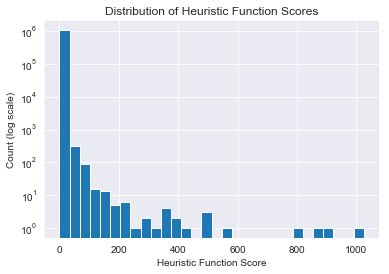

In [13]:
plt.hist(AS['Euclidean_Distance_HF'], bins = 30, log = True)
plt.xlabel('Heuristic Function Score')
plt.ylabel('Count (log scale)')
plt.title('Distribution of Heuristic Function Scores');

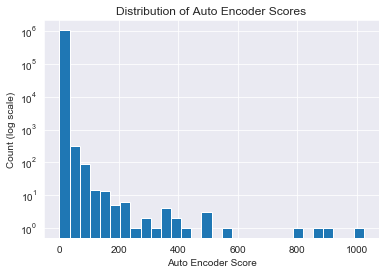

In [14]:
plt.hist(AS['Euclidean_Distance_AE'], bins = 30, log = True)
plt.xlabel('Auto Encoder Score')
plt.ylabel('Count (log scale)')
plt.title('Distribution of Auto Encoder Scores');

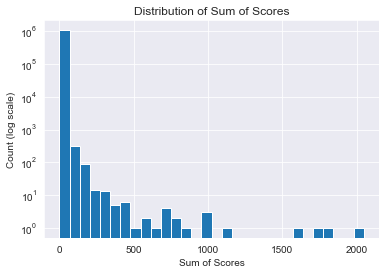

In [15]:
plt.hist(AS['SUM'], bins = 30, log = True)
plt.xlabel('Sum of Scores')
plt.ylabel('Count (log scale)')
plt.title('Distribution of Sum of Scores');

In [81]:
AS.sort_values('Euclidean_Distance_HF', ascending = False).head(10)

,BBLE,Euclidean_Distance_HF,Euclidean_Distance_AE,SUM
632815,4018420001,1024.720577,1023.813313,2048.533890
776305,4080100001,912.718473,911.635123,1824.353596
565391,3085900700,885.116850,884.577705,1769.694554
1067359,5078530085,805.184492,803.502075,1608.686567
585117,4004200001,559.454341,558.748106,1118.202447
585438,4004590005,501.268249,500.521084,1001.789333
565397,3085910100,493.842597,493.799394,987.641991
85885,1012540010,483.650241,483.272188,966.922429
917941,4142600001,422.921011,422.009502,844.930513
750815,4066610005E,407.191244,405.658746,812.849990


In [82]:
AS.sort_values('Euclidean_Distance_AE', ascending = False).head(10)

,BBLE,Euclidean_Distance_HF,Euclidean_Distance_AE,SUM
632815,4018420001,1024.720577,1023.813313,2048.533890
776305,4080100001,912.718473,911.635123,1824.353596
565391,3085900700,885.116850,884.577705,1769.694554
1067359,5078530085,805.184492,803.502075,1608.686567
585117,4004200001,559.454341,558.748106,1118.202447
585438,4004590005,501.268249,500.521084,1001.789333
565397,3085910100,493.842597,493.799394,987.641991
85885,1012540010,483.650241,483.272188,966.922429
917941,4142600001,422.921011,422.009502,844.930513
750815,4066610005E,407.191244,405.658746,812.849990


In [63]:
AS.sort_values('SUM', ascending = False).head(10)

,BBLE,Euclidean_Distance_HF,Euclidean_Distance_AE,SUM
632815,4018420001,1024.720577,1024.940893,2049.661470
776305,4080100001,912.718473,911.180198,1823.898671
565391,3085900700,885.116850,884.742928,1769.859778
1067359,5078530085,805.184492,803.204341,1608.388833
585117,4004200001,559.454341,557.886204,1117.340546
585438,4004590005,501.268249,499.246620,1000.514869
565397,3085910100,493.842597,492.763180,986.605777
85885,1012540010,483.650241,481.265813,964.916053
917941,4142600001,422.921011,422.139731,845.060742
750815,4066610005E,407.191244,405.463862,812.655106


In [64]:
AS.to_csv('Data/AS.csv')

# Fraud Detection

In [4]:
AS = pd.read_csv('Data/AS.csv', index_col = 0)
df = pd.read_csv('Data/NY property data.csv', index_col = 0)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [23]:
BBLE_AS = AS.sort_values('SUM', ascending = False).head(20)['BBLE'].values

In [24]:
AS.head()

,BBLE,Euclidean_Distance_HF,Euclidean_Distance_AE,SUM
0,1000010101,1.537640,0.685626,2.223267
1,1000010201,24.818232,22.858678,47.676909
2,1000020001,0.162913,0.070510,0.233423
3,1000020023,0.166143,0.061508,0.227652
4,1000030001,24.311942,21.891265,46.203207


In [25]:
df.head()

,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
RECORD,,,,,,,,,,,,,,,,,,,,,
1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,...,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,...,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,...,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR
4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,...,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR
5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,...,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR


In [32]:
df_new = pd.merge(left = df, right = AS, on = ['BBLE'], how = 'left')

In [33]:
df_new[df_new['BBLE'].isin(BBLE_AS)].to_csv('Data/Potential Fraud.csv')

In [34]:
df_new.describe()

,B,BLOCK,LOT,LTFRONT,LTDEPTH,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,Euclidean_Distance_HF,Euclidean_Distance_AE,SUM
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.014730e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,...,1.070994e+06,1.070994e+06,2.827260e+05,2.827320e+05,8.744900e+04,1.308280e+05,92948.000000,1.070994e+06,1.070994e+06,1.070994e+06
mean,3.215427e+00,4.757239e+03,3.647221e+02,3.663530e+01,8.886159e+01,5.006918e+00,8.742645e+05,8.506792e+04,2.272382e+05,3.642389e+04,...,2.304277e+01,3.992284e+01,2.462357e+05,7.139114e+05,3.512357e+05,6.567683e+05,1364.041679,2.273795e-01,1.074381e-01,3.348177e-01
std,1.201197e+00,3.676579e+03,8.532152e+02,7.403284e+01,7.639628e+01,8.365707e+00,1.158243e+07,4.057260e+06,6.877529e+06,3.981576e+06,...,3.557970e+01,4.270715e+01,6.178963e+06,1.165253e+07,1.080221e+07,1.607251e+07,1094.705653,2.819274e+00,2.777111e+00,5.593891e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00,7.000000e+00,1011.000000,1.033915e-02,4.822726e-03,1.840537e-02
25%,3.000000e+00,1.555000e+03,2.300000e+01,1.900000e+01,8.000000e+01,2.000000e+00,3.040000e+05,9.180000e+03,1.837400e+04,0.000000e+00,...,1.500000e+01,2.600000e+01,5.705000e+03,3.391200e+04,2.090000e+03,2.870000e+03,1017.000000,7.782037e-02,2.628844e-02,1.063368e-01
50%,3.000000e+00,4.047000e+03,4.900000e+01,2.500000e+01,1.000000e+02,2.000000e+00,4.470000e+05,1.367800e+04,2.534000e+04,1.620000e+03,...,2.000000e+01,3.900000e+01,2.014500e+04,7.996250e+04,3.048000e+03,3.706200e+04,1017.000000,1.175707e-01,3.778002e-02,1.624955e-01
75%,4.000000e+00,6.898000e+03,1.430000e+02,4.000000e+01,1.000000e+02,3.000000e+00,6.190000e+05,1.974000e+04,4.543800e+04,1.620000e+03,...,2.400000e+01,5.000000e+01,6.264000e+04,2.405510e+05,3.177900e+04,1.068408e+05,1017.000000,2.035619e-01,5.031924e-02,2.468665e-01
max,5.000000e+00,1.635000e+04,9.978000e+03,9.999000e+03,9.999000e+03,1.190000e+02,6.150000e+09,2.668500e+09,4.668309e+09,2.668500e+09,...,7.575000e+03,9.393000e+03,2.371005e+09,4.501180e+09,2.371005e+09,4.501180e+09,7160.000000,1.024721e+03,1.024941e+03,2.049661e+03
